# 如何调试梯度

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(666)
x = np.random.random(size = (1000, 10))
true_theta = np.arange(1, 12, dtype = float)
X = np.hstack([np.ones((len(x), 1)), x])
y = X.dot(true_theta) + np.random.normal(size = 1000)

In [3]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
def J(x_b, theta, y):
    return np.sum((x_b.dot(theta) - y) ** 2) / len(x_b)

In [5]:
def Debug_delta(x_b, theta, y, epsilon=0.01):
    res = np.empty(len(theta))
    
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        
        res[i] = (J(x_b, theta_1, y) - J(x_b, theta_2, y)) / (2. * epsilon)
        
    return res

In [6]:
theta_init = np.zeros(len(true_theta))
eta = 0.01
iter_times = 10000

loss_his = []
theta_his = []

In [7]:
theta_cur = theta_init
while iter_times:
    gradient = Debug_delta(X, theta_cur, y)
    theta_cur -= eta * gradient
    
    loss_his.append(J(X, theta_cur, y))
    theta_his.append(theta_cur)
    
    iter_times -=1

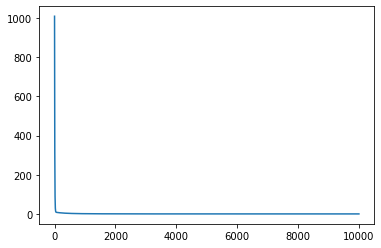

In [8]:
plt.plot(loss_his)
plt.show()

In [9]:
theta_his

[array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        1